In [1]:
import os

import pandas as pd
from sqlalchemy import create_engine

In [2]:
db_path = os.path.join(os.path.dirname("__file__"), "..", "..", "data", "ufc.db")
engine = create_engine(f"sqlite:///{db_path}")

In [6]:
query = """
SELECT * FROM ufcstats_bouts
WHERE event_id IN (
    SELECT id FROM ufcstats_events
    WHERE is_ufc_event = 1 AND date >= '2021-01-01'
)
ORDER BY rowid ASC;
"""

test_df = pd.read_sql(query, engine)
test_df

,id,event_id,bout_order,red_fighter_id,blue_fighter_id,red_outcome,blue_outcome,weight_class,type_verbose,performance_bonus,outcome_method,outcome_method_details,end_round,end_round_time_seconds,round_time_format,total_time_seconds
0,3d903bc35023f50a,307064d3e0f036c2,1,637bd06c32219f0b,305d73ede05e31ad,L,W,Featherweight,Featherweight Bout,0,Decision - Unanimous,David Lethaby 26 - 30. Paul Sutherland 26 - 30...,3,300,3 Rnd (5-5-5),900
1,97c80f69ac312030,307064d3e0f036c2,2,539ed332b3078821,9b7dfb3b7d99926a,L,W,Women's Bantamweight,Women's Bantamweight Bout,0,Decision - Unanimous,Lukasz Bosacki 27 - 30. Anders Ohlsson 28 - 29...,3,300,3 Rnd (5-5-5),900
2,3fcd53eb27945231,307064d3e0f036c2,3,3bb2dc8e87b10a46,abd5fb12437eda21,L,W,Welterweight,Welterweight Bout,0,Decision - Split,Ben Cartlidge 28 - 29. Mike Bell 29 - 28. Davi...,3,300,3 Rnd (5-5-5),900
3,0165bd3c26f0c076,307064d3e0f036c2,4,a2ea77e974c5889f,e13abac8089a801a,W,L,Heavyweight,Heavyweight Bout,0,Decision - Split,Lukasz Bosacki 28 - 29. Anders Ohlsson 29 - 28...,3,300,3 Rnd (5-5-5),900
4,97ad63e644757cf4,307064d3e0f036c2,5,fdbefee0827e1567,f9ab66e67240db7b,L,W,Women's Bantamweight,Women's Bantamweight Bout,0,Decision - Unanimous,Lukasz Bosacki 27 - 30. Anders Ohlsson 27 - 30...,3,300,3 Rnd (5-5-5),900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,5238f6470d0557fb,72c9c2eadfc3277e,9,0232cabbc30a2372,850266b3dc4e506e,L,W,Bantamweight,Bantamweight Bout,0,Decision - Split,Derek Cleary 27 - 30. Chris Lee 29 - 28. Eric ...,3,300,3 Rnd (5-5-5),900
2053,7b1bc4ff776f12c1,72c9c2eadfc3277e,10,71171fc96445bf65,e4277e87a789d687,L,W,Light Heavyweight,Light Heavyweight Bout,1,KO/TKO,Punch to Head At Distance,3,224,3 Rnd (5-5-5),824
2054,1a635a5e4551e7d5,72c9c2eadfc3277e,11,5d1b7e3dd9e11074,294aa73dbf37d281,W,L,Flyweight,Flyweight Bout,0,KO/TKO,Punches to Head At Distance,3,117,3 Rnd (5-5-5),717
2055,7521015554088962,72c9c2eadfc3277e,12,d247691a6c0e9034,aa171d55d4b5208f,W,L,Featherweight,Featherweight Bout,0,KO/TKO,Punch to Head At Distance,3,96,3 Rnd (5-5-5),696


In [7]:
len(test_df["event_id"].unique())

170

In [8]:
query = """
SELECT * FROM ufcstats_bouts
WHERE event_id IN (
    SELECT id FROM ufcstats_events
    WHERE is_ufc_event = 1 AND date >= '2008-04-19' AND date < '2021-01-01'
) AND red_outcome IN ('W', 'L')
ORDER BY rowid ASC;
"""

train_df = pd.read_sql(query, engine)
train_df

,id,event_id,bout_order,red_fighter_id,blue_fighter_id,red_outcome,blue_outcome,weight_class,type_verbose,performance_bonus,outcome_method,outcome_method_details,end_round,end_round_time_seconds,round_time_format,total_time_seconds
0,be38ed9ccfe2ee03,ad047e3073a775f3,1,fb1538b46877a695,9d4522df6fc49a47,W,L,Welterweight,Welterweight Bout,0,KO/TKO,Punch to Head At Distance,2,127,3 Rnd (5-5-5),427
1,eb1b371dfc37fcdb,ad047e3073a775f3,2,0ff11cc094e887bc,6803d4d6908354ac,W,L,Heavyweight,Heavyweight Bout,0,KO/TKO,Punches to Head From Side Control,1,130,3 Rnd (5-5-5),130
2,219bd976b8ca745d,ad047e3073a775f3,3,501b07aec9b8fc2d,7d21de9c6d7c98b2,L,W,Lightweight,Lightweight Bout,0,Decision - Split,Doug Crosby 27 - 29. Sylvain Leblanc 29 - 28. ...,3,300,3 Rnd (5-5-5),900
3,af178adff964d854,ad047e3073a775f3,4,06f36cf4bd97ec77,427b5953ac8e3a27,L,W,Middleweight,Middleweight Bout,1,Submission,Triangle Choke From Bottom Guard Technical Sub...,2,147,3 Rnd (5-5-5),447
4,920194911d727a38,ad047e3073a775f3,5,4130a743d9d22163,a6fd2173d5e2d7f0,L,W,Middleweight,Middleweight Bout,0,KO/TKO,Punches to Head At Distance,1,238,3 Rnd (5-5-5),238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,cd150cd28738a7c5,e49c2db95e572dc8,8,c9cf753cfdf77fc2,85073dbd1be65ed9,W,L,Heavyweight,Heavyweight Bout,1,KO/TKO,Punches to Head From Half Guard,2,271,3 Rnd (5-5-5),571
4921,8955ea3c7c332e6c,e49c2db95e572dc8,9,fea79f9bc8c68769,05339613bf8e9808,L,W,Bantamweight,Bantamweight Bout,1,KO/TKO,Punches to Head On Ground,1,227,3 Rnd (5-5-5),227
4922,3d35eb2d46bf74de,e49c2db95e572dc8,10,595db60957de51d3,2558ae2e5671e318,W,L,Welterweight,Welterweight Bout,0,Decision - Unanimous,Mike Bell 28 - 29. Eric Colon 28 - 29. Tony We...,3,300,3 Rnd (5-5-5),900
4923,014f1da2083ca174,e49c2db95e572dc8,11,d0f3959b4a9747e6,7c7332319c14094c,W,L,Bantamweight,Bantamweight Bout,0,Decision - Unanimous,Mike Bell 28 - 29. Eric Colon 28 - 29. Ron McC...,3,300,3 Rnd (5-5-5),900


In [9]:
len(train_df["event_id"].unique())

439

In [54]:
query = """
SELECT bout_id AS fightoddsio_bout_id, fighter_1_id, fighter_2_id, fighter_1_odds_current, fighter_2_odds_current
FROM fightoddsio_moneyline_odds
LEFT JOIN fightoddsio_bouts ON fightoddsio_moneyline_odds.bout_id = fightoddsio_bouts.id
WHERE sportsbook_id = (
    SELECT id FROM fightoddsio_sportsbooks
    WHERE full_name = 'BetOnline'
)
ORDER BY fightoddsio_bouts.rowid ASC, fightoddsio_moneyline_odds.rowid ASC;
"""

betonline_odds = pd.read_sql(query, engine).drop_duplicates(keep="last", subset=["fightoddsio_bout_id"])
f1_odds = betonline_odds[["fightoddsio_bout_id", "fighter_1_id", "fighter_1_odds_current"]].rename({"fighter_1_id": "fighter_id", "fighter_1_odds_current": "odds"}, axis=1)
f2_odds = betonline_odds[["fightoddsio_bout_id", "fighter_2_id", "fighter_2_odds_current"]].rename({"fighter_2_id": "fighter_id", "fighter_2_odds_current": "odds"}, axis=1)
odds_df = pd.concat([f1_odds, f2_odds])
odds_df

,fightoddsio_bout_id,fighter_id,odds
0,RmlnaHROb2RlOjE0OTE2,RmlnaHRlck5vZGU6NzI4,100.0
1,RmlnaHROb2RlOjE0OTkw,RmlnaHRlck5vZGU6MTA3OA==,250.0
2,RmlnaHROb2RlOjE1NTc0,RmlnaHRlck5vZGU6MTIxOQ==,-290.0
3,RmlnaHROb2RlOjE1MDAw,RmlnaHRlck5vZGU6MzQwNg==,-500.0
4,RmlnaHROb2RlOjE0OTY4,RmlnaHRlck5vZGU6MTM1Mg==,-300.0
...,...,...,...
3440,RmlnaHROb2RlOjU3Mzcy,RmlnaHRlck5vZGU6Mzg5MTU=,-260.0
3441,RmlnaHROb2RlOjU2NzY3,RmlnaHRlck5vZGU6MTcxNDI=,300.0
3442,RmlnaHROb2RlOjU2OTcw,RmlnaHRlck5vZGU6MTQ5MTk=,-200.0
3443,RmlnaHROb2RlOjU3NjE2,RmlnaHRlck5vZGU6ODk5Mw==,-225.0


In [64]:
query = """
SELECT 
    ufcstats_bouts.id AS bout_id, 
    event_id, 
    date, 
    bout_mapping.fightoddsio_id AS fightoddsio_bout_id, 
    red_mapping.fightoddsio_id AS red_fighter_id, 
    blue_mapping.fightoddsio_id AS blue_fighter_id,
    CASE
        WHEN red_outcome = 'W' THEN 1
        WHEN red_outcome = 'L' THEN 0
        ELSE NULL
    END AS red_win
FROM ufcstats_bouts
LEFT JOIN ufcstats_events ON ufcstats_bouts.event_id = ufcstats_events.id
LEFT JOIN bout_mapping ON ufcstats_bouts.id = bout_mapping.ufcstats_id
LEFT JOIN fighter_mapping AS red_mapping ON ufcstats_bouts.red_fighter_id = red_mapping.ufcstats_id
LEFT JOIN fighter_mapping AS blue_mapping ON ufcstats_bouts.blue_fighter_id = blue_mapping.ufcstats_id
WHERE is_ufc_event = 1 AND date >= '2021-01-01'
"""

backtest_df = pd.read_sql(query, engine)
backtest_df = backtest_df.merge(odds_df, left_on=["fightoddsio_bout_id", "red_fighter_id"], right_on=["fightoddsio_bout_id", "fighter_id"], how="left").drop(["red_fighter_id", "fighter_id"], axis=1).rename({"odds": "red_odds"}, axis=1)
backtest_df = backtest_df.merge(odds_df, left_on=["fightoddsio_bout_id", "blue_fighter_id"], right_on=["fightoddsio_bout_id", "fighter_id"], how="left").drop(["blue_fighter_id", "fighter_id"], axis=1).rename({"odds": "blue_odds"}, axis=1)

# from oddsportal
backtest_df.loc[backtest_df["fightoddsio_bout_id"] == "RmlnaHROb2RlOjUyNTg3", "red_odds"] = -118
backtest_df.loc[backtest_df["fightoddsio_bout_id"] == "RmlnaHROb2RlOjU3MjM1", "red_odds"] = -330
backtest_df.loc[backtest_df["fightoddsio_bout_id"] == "RmlnaHROb2RlOjUzMTc2", "red_odds"] = -270
backtest_df.loc[backtest_df["fightoddsio_bout_id"] == "RmlnaHROb2RlOjUzMTc2", "blue_odds"] = 222
backtest_df["red_odds"] = backtest_df["red_odds"].astype(int)
backtest_df["blue_odds"] = backtest_df["blue_odds"].astype(int)
backtest_df["red_win"] = backtest_df["red_win"].astype("Int64")
backtest_df = backtest_df.drop("fightoddsio_bout_id", axis=1)
backtest_df

,bout_id,event_id,date,red_win,red_odds,blue_odds
0,3d903bc35023f50a,307064d3e0f036c2,2021-01-16,0,190,-225
1,97c80f69ac312030,307064d3e0f036c2,2021-01-16,0,-185,160
2,3fcd53eb27945231,307064d3e0f036c2,2021-01-16,0,268,-318
3,0165bd3c26f0c076,307064d3e0f036c2,2021-01-16,1,-191,166
4,97ad63e644757cf4,307064d3e0f036c2,2021-01-16,0,102,-122
...,...,...,...,...,...,...
2052,5238f6470d0557fb,72c9c2eadfc3277e,2024-12-14,0,220,-260
2053,7b1bc4ff776f12c1,72c9c2eadfc3277e,2024-12-14,0,-300,250
2054,1a635a5e4551e7d5,72c9c2eadfc3277e,2024-12-14,1,-400,300
2055,7521015554088962,72c9c2eadfc3277e,2024-12-14,1,170,-200


In [66]:
def calculate_implied_prob(red_odds, blue_odds):
    if red_odds < 0:
        red_prob = abs(red_odds) / (abs(red_odds) + 100)
    else:
        red_prob = 100 / (red_odds + 100)
    
    if blue_odds < 0:
        blue_prob = abs(blue_odds) / (abs(blue_odds) + 100)
    else:
        blue_prob = 100 / (blue_odds + 100)

    red_implied_prob = red_prob / (red_prob + blue_prob)

    return red_implied_prob

backtest_df["red_implied_prob_no_vig"] = backtest_df.apply(lambda x: calculate_implied_prob(x["red_odds"], x["blue_odds"]), axis=1)
backtest_df

,bout_id,event_id,date,red_win,red_odds,blue_odds,red_implied_prob_no_vig
0,3d903bc35023f50a,307064d3e0f036c2,2021-01-16,0,190,-225,0.332481
1,97c80f69ac312030,307064d3e0f036c2,2021-01-16,0,-185,160,0.627937
2,3fcd53eb27945231,307064d3e0f036c2,2021-01-16,0,268,-318,0.263184
3,0165bd3c26f0c076,307064d3e0f036c2,2021-01-16,1,-191,166,0.635822
4,97ad63e644757cf4,307064d3e0f036c2,2021-01-16,0,102,-122,0.473913
...,...,...,...,...,...,...,...
2052,5238f6470d0557fb,72c9c2eadfc3277e,2024-12-14,0,220,-260,0.302013
2053,7b1bc4ff776f12c1,72c9c2eadfc3277e,2024-12-14,0,-300,250,0.724138
2054,1a635a5e4551e7d5,72c9c2eadfc3277e,2024-12-14,1,-400,300,0.761905
2055,7521015554088962,72c9c2eadfc3277e,2024-12-14,1,170,-200,0.357143


In [67]:
backtest_df2 = backtest_df.loc[backtest_df["red_win"].notnull()]
backtest_df2

,bout_id,event_id,date,red_win,red_odds,blue_odds,red_implied_prob_no_vig
0,3d903bc35023f50a,307064d3e0f036c2,2021-01-16,0,190,-225,0.332481
1,97c80f69ac312030,307064d3e0f036c2,2021-01-16,0,-185,160,0.627937
2,3fcd53eb27945231,307064d3e0f036c2,2021-01-16,0,268,-318,0.263184
3,0165bd3c26f0c076,307064d3e0f036c2,2021-01-16,1,-191,166,0.635822
4,97ad63e644757cf4,307064d3e0f036c2,2021-01-16,0,102,-122,0.473913
...,...,...,...,...,...,...,...
2052,5238f6470d0557fb,72c9c2eadfc3277e,2024-12-14,0,220,-260,0.302013
2053,7b1bc4ff776f12c1,72c9c2eadfc3277e,2024-12-14,0,-300,250,0.724138
2054,1a635a5e4551e7d5,72c9c2eadfc3277e,2024-12-14,1,-400,300,0.761905
2055,7521015554088962,72c9c2eadfc3277e,2024-12-14,1,170,-200,0.357143


In [68]:
from sklearn.metrics import log_loss
from sklearn.calibration import CalibrationDisplay

log_loss(backtest_df2["red_win"], backtest_df2["red_implied_prob_no_vig"])

0.6020389967661395

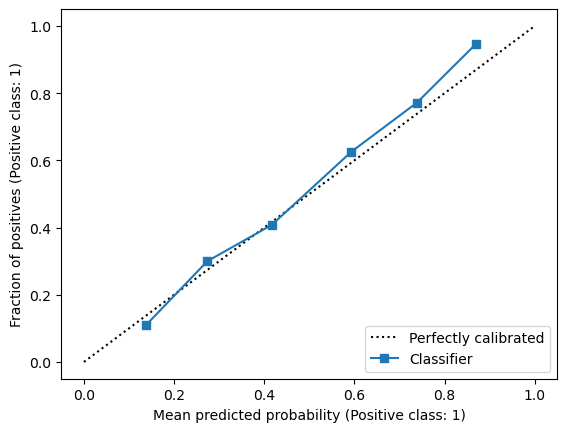

In [76]:
disp = CalibrationDisplay.from_predictions(backtest_df2["red_win"], backtest_df2["red_implied_prob_no_vig"], n_bins=6)